## Assignment: quadratic function prediction (predict Nonlinear function )

Let's use nonlinear quadratic function to create ideal dataset (without noise). Design a simple neural network model to predict test dataset  $$f(x) = ax_1^2 + bx_2 + c$$, where `a = 2, b = 1 ` and `c = 0` are constants.

Epoch 1, Loss: 0.01847890391945839, Val Loss: 3.300375461578369
Epoch 2, Loss: 0.003076401771977544, Val Loss: 1.7142266035079956
Epoch 3, Loss: 0.009368957951664925, Val Loss: 1.265488862991333
Epoch 4, Loss: 0.017898309975862503, Val Loss: 1.0597525835037231
Epoch 5, Loss: 0.020269174128770828, Val Loss: 0.9377145171165466
Epoch 6, Loss: 0.0214249137789011, Val Loss: 0.8142407536506653
Epoch 7, Loss: 0.01994764246046543, Val Loss: 0.713089108467102
Epoch 8, Loss: 0.019413400441408157, Val Loss: 0.6116076707839966
Epoch 9, Loss: 0.01949322782456875, Val Loss: 0.5154798030853271
Epoch 10, Loss: 0.021236995235085487, Val Loss: 0.4607411026954651
Epoch 11, Loss: 0.021788030862808228, Val Loss: 0.3964996337890625
Epoch 12, Loss: 0.01936465874314308, Val Loss: 0.3755493462085724
Epoch 13, Loss: 0.01664615049958229, Val Loss: 0.3350085914134979
Epoch 14, Loss: 0.014298942871391773, Val Loss: 0.3092333972454071
Epoch 15, Loss: 0.011607004329562187, Val Loss: 0.272756427526474
Epoch 16, Loss:

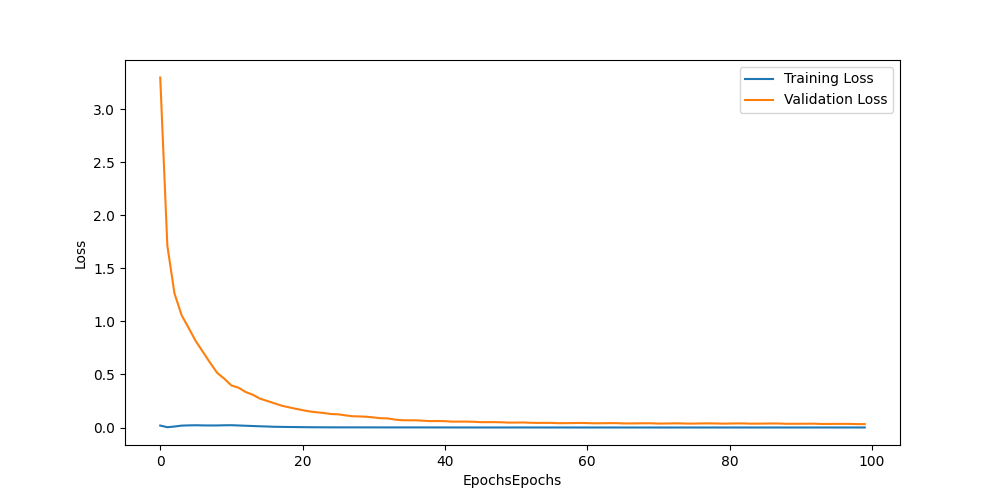

In [8]:
%matplotlib widget  
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the quadratic function
def f(x, a, b, c):
    '''assignment >>>> complete above function'''
    f = # fill <------------------------
    return f #.unsqueeze(1)



# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        '''assignment >>>> Do necessory changes and design a NN which minimize the loss by doing trial and error method'''
        '''hint : two inputs '''
        self.fc1 = nn.Linear(1, 10)  # 2 input features, 10 nodes in hidden layer
        self.fc2 = nn.Linear(10, 10)   # 10 nodes in hidden layer,10 output node
        self.fc3 = nn.Linear(10, 1)   # 10 nodes in hidden layer, 1 output node

    def forward(self, x):
        y1 = self.fc1(x)
        y2 = torch.relu(y1) # activation function
        y3 = self.fc2(y2)
        y4 = torch.relu(y3)
        y5 = self.fc3(y4)
        return y5

# Create the model
model = Net()

# Define loss function and optimizer
criterion = nn.MSELoss()
'''assignment >>>> pick proper lr '''
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Define the constants a, b, and c
a, b, c = 2, 1, 0

# Create a synthetic dataset
x_train = torch.randn(10000, 1)
# y_train = (2*x_train[:,0] + x_train[:,1]).unsqueeze(1) #torch.sum(x_train, axis=1).view(-1, 1)
y_train = f(x_train, a, b, c)

x_val = torch.randn(200, 1)
# y_val = (2*x_val[:,0]+x_val[:,1]).unsqueeze(1)
y_val = f(x_val, a, b, c)

# Create data loaders
train_loader = DataLoader(TensorDataset(x_train, y_train), batch_size=10)
val_loader = DataLoader(TensorDataset(x_val, y_val), batch_size=10)

# Prepare lists to save the losses
train_losses = []
val_losses = []

# Training loop
for epoch in range(100):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Validation
    with torch.no_grad():
        val_loss = sum(criterion(model(inputs), targets) for inputs, targets in val_loader)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    print(f"Epoch {epoch+1}, Loss: {loss.item()}, Val Loss: {val_loss.item()}")

# Save the model
torch.save(model.state_dict(), 'quad_model.pth')

# Plot the training and validation losses
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('EpochsEpochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("quad_loss.png")
plt.show()


In [7]:
# Load the model
model = Net()
model.load_state_dict(torch.load('quad_model.pth'))

x_test = torch.randn(1,1)
y_expected = f(x_test, a, b)
print("x_test : ",x_test)
print("y_expected : ",y_expected)

y_predicted = model(x_test)
print("y_predicted : ",y_predicted.detach())

FileNotFoundError: [Errno 2] No such file or directory: 'model.pth'

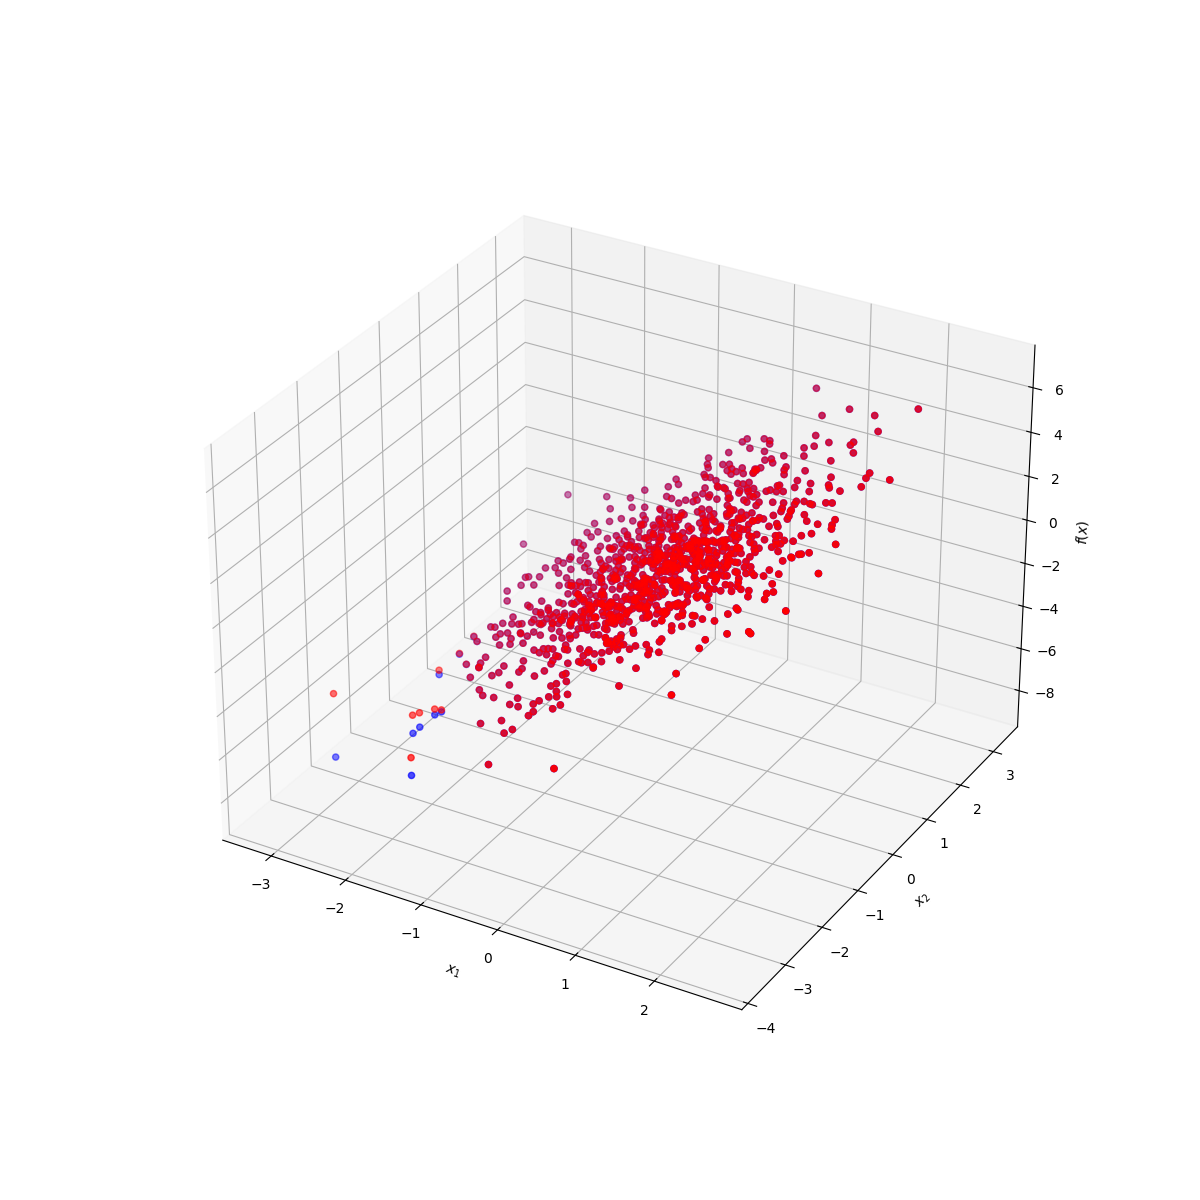

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
x_test = torch.randn(1000,2)
y_predicted = model(x_test)

ax.scatter(x_test[:,0], x_test[:,1], f(x_test, a, b), c='b', marker='o')
ax.scatter(x_test[:,0], x_test[:,1], y_predicted.detach(), c='r', marker='o')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')

plt.show()